In [41]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Text(0, 0.5, 'Risk')

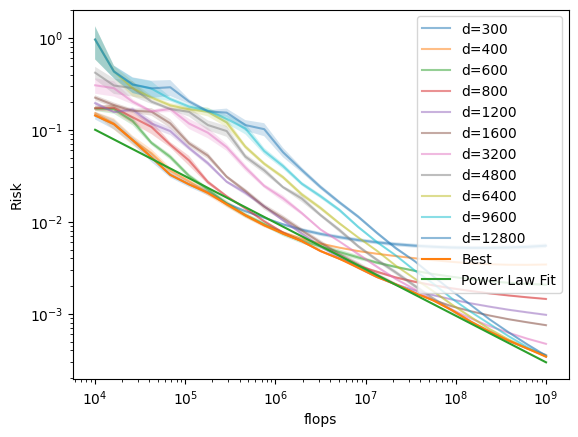

In [42]:
alpha = 0.6
beta = 0.2
v = 14080
tau = 1.0
Cmin = 4
Cmax = 9
mesh_size = 25
num_sims = 4
flops = np.logspace(Cmin,Cmax,mesh_size)

d_list = [300,400,600,800,1200,1600,3200,4800,6400,9600,12800]
num_d = len(d_list)
risks_mean = np.zeros((num_d,mesh_size))
risks_std = np.zeros((num_d,mesh_size))

for (i,d) in enumerate(d_list):
    mean_file = 'results/risks_mean_alpha={},beta={},tau={},v={},d={},gamma=0.1,B=1,Cmin={},Cmax={},mesh_size={},num_sims={}.npy'.format(
        alpha,beta,tau,v,d,Cmin,Cmax,mesh_size,num_sims)
    std_file = 'results/risks_std_alpha={},beta={},tau={},v={},d={},gamma=0.1,B=1,Cmin={},Cmax={},mesh_size={},num_sims={}.npy'.format(
        alpha,beta,tau,v,d,Cmin,Cmax,mesh_size,num_sims)
    mean = np.load(mean_file)
    stderr = np.load(std_file)

    risks_mean[i,:] = mean

    plt.plot(flops,mean,label="d={}".format(d),alpha=0.5)
    plt.fill_between(flops,mean-stderr,mean+stderr,alpha=0.2)
    

best_means = np.min(risks_mean,axis=0)

X = sm.add_constant(np.log(flops))
power_law = sm.OLS(np.log(best_means),X)
res = power_law.fit()
coefs = res.params
yhat = np.exp(coefs[0]) * flops**(coefs[1])

plt.plot(flops,best_means,label="Best")
plt.plot(flops,yhat,label="Power Law Fit")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("flops")
plt.ylabel("Risk")

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2786.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.66e-25
Time:                        02:10:19   Log-Likelihood:                 10.497
No. Observations:                  25   AIC:                            -16.99
Df Residuals:                      23   BIC:                            -14.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3611      0.147     16.037      0.000       2.057       2.666
x1            -0.5058      0.010    -52.778      0.000      -0.526      -0.486
==============================================================================
Omnibus:                        3.468   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.472
Skew:                           0.770   Prob(JB):                        0.291
Kurtosis:                       3.025   Cond. No.                         68.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""